# Overview of statistical inference

- frequency manipulation
- autocorrelation
- time-series decomposition
- stationarity tests

In [2]:
import pandas as pd
data_folder = "./data/"
crypto_df = pd.read_csv(data_folder + 'train.csv')

## Different frequency

- ohlc dataframe with differenct frequency.
- Single series with different frequency.

In [3]:
from script.morestats import ohlcv_with_frequency, ts_with_frequency
import plotly.graph_objects as go
btc = crypto_df[crypto_df["Asset_ID"]==1] # Asset_ID = 1 for Bitcoin
btc_mini = btc.iloc[-200:,:] # Select recent data row
print(btc_mini.head())

btc_mini=ohlcv_with_frequency(df=btc_mini,frequency='5min')
print(btc_mini.head())
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, 
                                    open=btc_mini['Open'], 
                                    high=btc_mini['High'], 
                                    low=btc_mini['Low'], 
                                    close=btc_mini['Close'])])
fig.show()

           timestamp  Asset_ID   Count          Open          High       Low  \
24234009  1632170460         1  5694.0  43558.393750  43588.680000  43427.28   
24234023  1632170520         1  2528.0  43449.818571  43495.954028  43414.33   
24234037  1632170580         1  3985.0  43427.082310  43455.218478  43327.29   
24234051  1632170640         1  2185.0  43362.572857  43454.990000  43348.06   
24234065  1632170700         1  2623.0  43419.832500  43467.000000  43351.15   

                 Close      Volume          VWAP    Target  
24234009  43447.003750  191.442881  43493.981877 -0.000805  
24234023  43440.000000   80.692018  43455.988146  0.000418  
24234037  43360.723750  117.332513  43391.956795  0.000125  
24234051  43427.242857   76.361478  43403.880056  0.000956  
24234065  43375.040000   76.018320  43408.267118 -0.000430  
              Count      Volume      High       Low          Open  \
1632170700  14392.0  465.828889  43588.68  43327.29  43558.393750   
1632171000  131

/Users/dingxian/Documents/GitHub/Crypto_Forecasting_kaggle/script/morestats.py:29: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t = date_str.astype('int64') // 10**9 ##unix time with nanoseconds //10**9


/Users/dingxian/Documents/GitHub/Crypto_Forecasting_kaggle/script/morestats.py:29: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



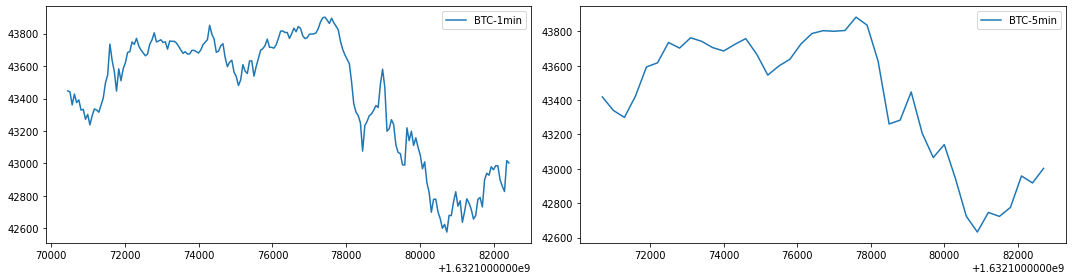

In [4]:
import matplotlib.pyplot as plt
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index('timestamp')
btc_mini = btc.iloc[-200:,:] # Select recent data row

f = plt.figure(figsize=(15,4))
ax = f.add_subplot(121)
plt.plot(btc_mini['Close'], label='BTC-1min')
plt.legend()

ax2 = f.add_subplot(122)
ax2.plot(ts_with_frequency(btc_mini['Close'], frequency='5min'), label='BTC-5min')
plt.legend()
plt.tight_layout()
plt.show()

## Autocorrelation 

$$s_{k}=\frac{1}{n} \sum_{i=1}^{n-k}\left(y_{i}-\bar{y}\right)\left(y_{i+k}-\bar{y}\right)=\frac{1}{n} \sum_{i=k+1}^{n}\left(y_{i}-\bar{y}\right)\left(y_{i-k}-\bar{y}\right)$$  

$$r_k = \frac{s_k}{s_0}$$

In [5]:
from matplotlib import pyplot
from script.morestats import log_return

Take 5-minute BTC("Asset_ID"=1) log return for example.

/Users/dingxian/Documents/GitHub/Crypto_Forecasting_kaggle/script/morestats.py:29: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



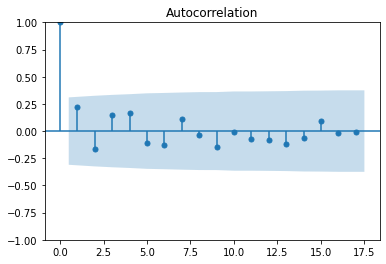

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from script.morestats import ts_with_frequency

ticker_id = 1
ticker = crypto_df[crypto_df["Asset_ID"]==ticker_id].set_index("timestamp") # Asset_ID = 1 for Bitcoin
ticker_mini = ticker.iloc[-200:] # Select recent 200 data rows
lret_ticker = log_return(ts_with_frequency(ticker_mini.Close, frequency='5min'))[1:]
plot_acf(lret_ticker)
pyplot.show()

In [7]:
from statsmodels.tsa.stattools import acf
acf(lret_ticker)

array([ 1.        ,  0.22300345, -0.16572461,  0.14992676,  0.16943098,
       -0.11037484, -0.12401055,  0.1126429 , -0.03998863, -0.14678928,
       -0.004823  , -0.07683669, -0.08140624, -0.12183986, -0.06091687,
        0.09130992, -0.0154014 ])

## Partial Autocorrelation
$$\frac{\operatorname{cov}\left(y_{i}, y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}{\sqrt{\operatorname{var}\left(y_{i} \mid y_{i-1}, \ldots, y_{i-h+1}\right) \cdot \operatorname{var}\left(y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}}$$

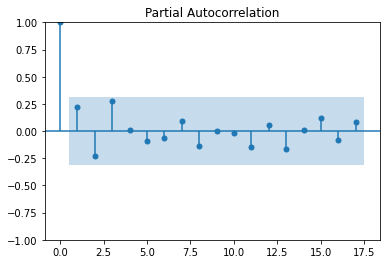

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lret_ticker,method='ywm')
pyplot.show()

In [9]:
from statsmodels.tsa.stattools import pacf
pacf(lret_ticker)

array([ 1.        ,  0.22872149, -0.23927795,  0.29801839,  0.00751242,
       -0.11132402, -0.06900502,  0.11875178, -0.1780027 ,  0.00820432,
       -0.02724231, -0.21268755,  0.08472628, -0.26502616,  0.01981886,
        0.22023236, -0.19462007])

## Decomposition
- Time Series decomposition: Trend, Seasonal, Staionary.
- Wold Theorem

### Data Preview
>>Given the obvious system dynamic change, we decompose the BTC series among a special growing period.

/Users/dingxian/Documents/GitHub/Crypto_Forecasting_kaggle/script/morestats.py:29: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



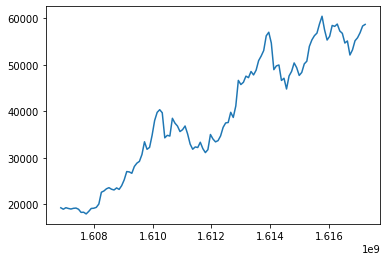

In [10]:
from script.morestats import d2s,ts_with_frequency
import matplotlib.pyplot as plt

btc = crypto_df[crypto_df["Asset_ID"]==1].set_index('timestamp')['Close']

## daily freq
btc_freq = ts_with_frequency(series=btc, frequency='1D')
plt.plot(btc_freq.loc[d2s('2020-12-01'):d2s('2021-04-01')])

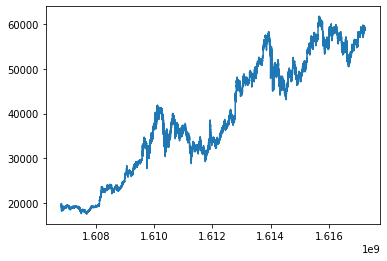

In [11]:
## minute freq
btc_freq = ts_with_frequency(series=btc, frequency='1min')
plt.plot(btc_freq.loc[d2s('2020-12-01'):d2s('2021-04-01')])

### Additive decomposition model

Any Periodical pattern?  

Try additive model below Seasonal+Trend+Residual.

$$y_{t}=S_{t}+T_{t}+R_{t}$$

Reference: [Forecasting: Principles and Practice](https://otexts.com/fpp2/components.html)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from script.morestats import s2d
import numpy as np
btc_freq = ts_with_frequency(series=btc, frequency='1min')
btc_freq = btc_freq.loc[d2s('2020-12-01'):d2s('2021-04-01')]
btc_freq.index = s2d(btc_freq.index)

In [13]:
result = seasonal_decompose(x=btc_freq.dropna(), model='additive',period=60*24*7)#one week as a period

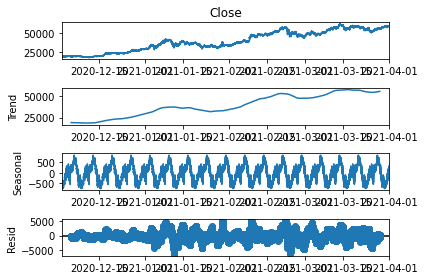

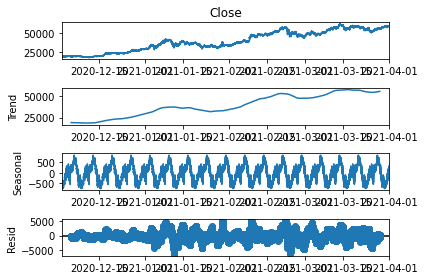

In [14]:
result.plot()

<AxesSubplot:>

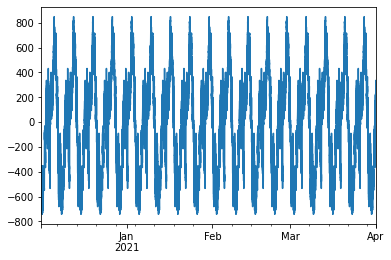

In [15]:
result.seasonal.plot()

<AxesSubplot:>

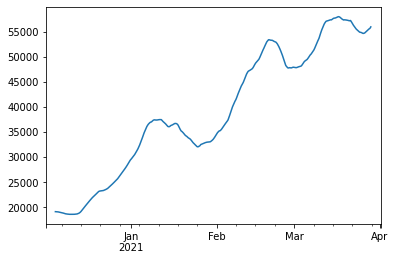

In [16]:
result.trend.plot()

## Stationarity Test

- Take BTC ('2020-12-01':'2021-04-01') for example
- Test on price series, decomposition residuals, log return.
- Augmented Dickey-Fuller test: test for a unit root in a univariate process in the presence of serial correlation. The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root.

More details on `adfuller()`: [https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

Returns: `(test statistic, p-value, number of lags, The number of observations,{Critical values for the test statistic at the 1 %, 5 %, and 10 % levels},maximized information criterion)`

### Price series stationarity

<AxesSubplot:>

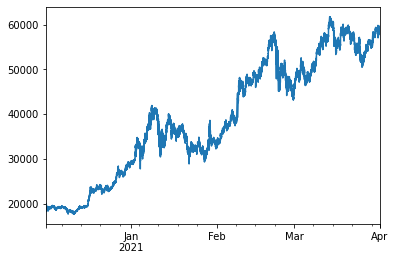

In [17]:
# btc
btc_freq.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
adfuller(btc_freq)

(-0.8424803041451526,
 0.8063243277315483,
 67,
 174113,
 {'1%': -3.4303875583466557,
  '5%': -2.8615566002786634,
  '10%': -2.566778835733881},
 1908997.7161229025)

>>we  have a p-value above 0.8, which implies cannot reject the null or there is unit-root in the btc price series. Similar case in ETC, which lead us to study the cointegration relationships.


### Decomposition residuals stationarity

<AxesSubplot:>

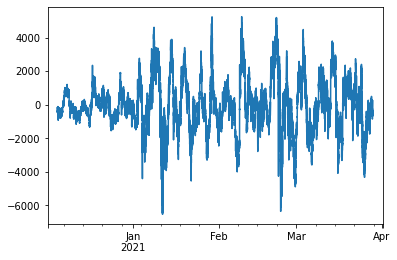

In [20]:
#time series residual from decomposition
resid = (btc_freq - result.seasonal-result.trend)
resid.plot()

In [27]:
resid.fillna(0,inplace=True)

In [26]:
adfuller(resid)

(-7.3356889656961375,
 1.0981217810537638e-10,
 67,
 174113,
 {'1%': -3.4303875583466557,
  '5%': -2.8615566002786634,
  '10%': -2.566778835733881},
 1893432.852137311)

>>we  have a p-value almost zero which implies reject the null or no unit-root exists in the decomposition residuals.

### Log-return stationarity

<AxesSubplot:>

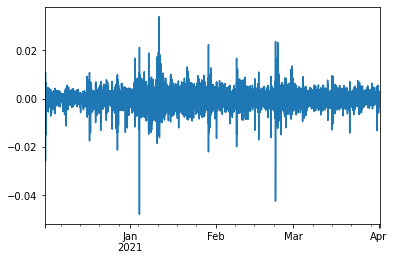

In [28]:
# log return of btc
from script.morestats import log_return
btc_logreturn = log_return(series=btc_freq)
btc_logreturn.plot()

In [30]:
adfuller(btc_logreturn.fillna(0))

(-52.344113525208535,
 0.0,
 66,
 174114,
 {'1%': -3.430387558130941,
  '5%': -2.861556600183321,
  '10%': -2.5667788356831336},
 -1782249.4063105355)

>>we  have a p-value almost zero which implies reject the null or no unit-root exists in the log return series.